# Import Libraries and Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

## Reading Data for potential Outliers and Nan's

In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
col = [feature for feature in df.columns if sum(df[feature] == 0) >= 1]

In [7]:
col

['X2 house age', 'X4 number of convenience stores']

In [9]:
df.loc[df['X2 house age'] == 0]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
16,17,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1
85,86,2012.750,0.0,338.9679,9,24.96853,121.54413,50.8
90,91,2012.833,0.0,274.0144,1,24.97480,121.53059,45.4
103,104,2012.750,0.0,208.3905,6,24.95618,121.53844,45.7
105,106,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0
123,124,2013.417,0.0,185.4296,0,24.97110,121.53170,45.5
146,147,2012.750,0.0,185.4296,0,24.97110,121.53170,52.2
164,165,2012.833,0.0,185.4296,0,24.97110,121.53170,55.2
166,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
211,212,2013.083,0.0,274.0144,1,24.97480,121.53059,43.5


(array([31., 27., 24., 19., 16., 33., 45., 52., 28., 16.,  5.,  5., 11.,
        16., 27., 23., 13., 12.,  9.,  2.]),
 array([ 0.  ,  2.19,  4.38,  6.57,  8.76, 10.95, 13.14, 15.33, 17.52,
        19.71, 21.9 , 24.09, 26.28, 28.47, 30.66, 32.85, 35.04, 37.23,
        39.42, 41.61, 43.8 ]),
 <BarContainer object of 20 artists>)

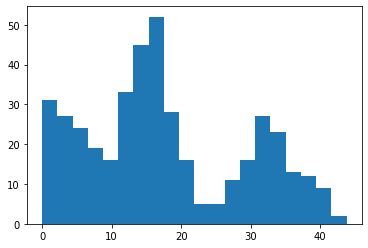

In [12]:
plt.hist(df['X2 house age'], bins = 20)

# Segregation of Year and Month

In [14]:
df['date'] = df['X1 transaction date'].astype(str)

In [15]:
df['year'] = df['date'].str.split('.', expand = True)[0]

In [16]:
df['month'] = df['date'].str.split('.', expand = True)[1]

In [17]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917,2012,917
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917,2012,917
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583,2013,583
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013.5,2013,5
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833,2012,833


In [18]:
df['month'] = df['month'].apply(lambda x : x[0])

In [19]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917,2012,9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917,2012,9
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583,2013,5
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013.5,2013,5
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833,2012,8


In [20]:
df['month'].value_counts()

0    74
5    70
4    58
9    38
2    32
8    31
6    30
3    29
7    27
1    25
Name: month, dtype: int64

In [24]:
df['month'] = np.where(df['month'] == '0', '1', df['month'])

In [25]:
df['month'].value_counts()

1    99
5    70
4    58
9    38
2    32
8    31
6    30
3    29
7    27
Name: month, dtype: int64

# Converting Year and Month based on Effect on Price

In [31]:
index = df.groupby('month')['Y house price of unit area'].sum().sort_values().index

In [34]:
order = {k : i for i,k in enumerate(index, 1)}

In [35]:
order

{'7': 1, '8': 2, '6': 3, '3': 4, '2': 5, '9': 6, '4': 7, '5': 8, '1': 9}

In [36]:
df['month'] = df['month'].map(order)

In [37]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917,2012,6
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917,2012,6
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583,2013,8
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013.5,2013,8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833,2012,2


<AxesSubplot:xlabel='year'>

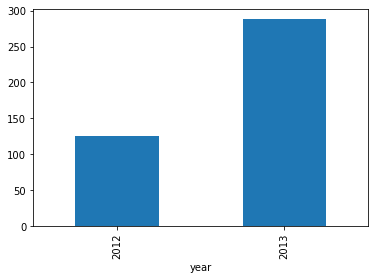

In [43]:
df.groupby('year')['Y house price of unit area'].count().plot.bar()

In [46]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
date                                       object
year                                        int32
month                                       int64
dtype: object

In [45]:
df['year'] = df['year'].astype(int)

In [47]:
df['year'] = np.where(df['year'] == 2013, 1 ,0)

In [48]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917,0,6
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917,0,6
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583,1,8
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013.5,1,8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833,0,2


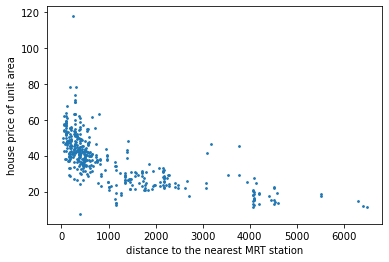

In [51]:
plt.scatter(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], s = 3)
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.show()

<AxesSubplot:ylabel='Frequency'>

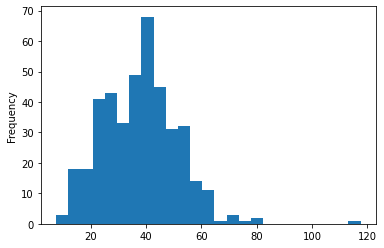

In [52]:
df['Y house price of unit area'].plot.hist(bins = 25)

In [53]:
df.loc[df['Y house price of unit area'] > 85]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month
270,271,2013.333,10.8,252.5822,1,24.9746,121.53046,117.5,2013.333,1,4


In [56]:
df['Y house price of unit area'] = np.where(df['Y house price of unit area'] > 85, df['Y house price of unit area'].median(), df['Y house price of unit area'])

<AxesSubplot:ylabel='Frequency'>

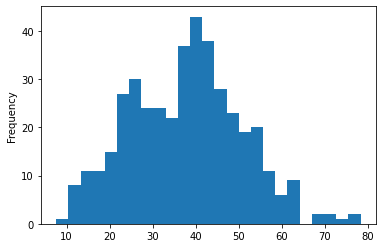

In [57]:
df['Y house price of unit area'].plot.hist(bins = 25)

In [58]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [59]:
df['geom'] = df['X5 latitude'].map(str) + ',' + df['X6 longitude'].map(str)

In [60]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month,geom
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917,0,6,"24.98298,121.54024"
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917,0,6,"24.98034,121.53951"
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583,1,8,"24.98746,121.54391"
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013.5,1,8,"24.98746,121.54391"
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833,0,2,"24.97937,121.54245"


In [61]:
def locator(coordinate):
    location = geolocator.reverse(coordinate)
    return(location)

In [62]:
df['location'] = df.apply(lambda x : locator(x['geom']), axis = 1)

In [63]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date,year,month,geom,location
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917,0,6,"24.98298,121.54024","(44-2, 民權路, 復興里, 新店區, 大坪林, 新北市, 23141, 臺灣, (24..."
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917,0,6,"24.98034,121.53951","(12, 大豐路, 大同里, 新店區, 大坪林, 新北市, 231, 臺灣, (24.979..."
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583,1,8,"24.98746,121.54391","(寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣..."
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013.5,1,8,"24.98746,121.54391","(寶安宮, 景美溪左岸自行車道, 信義里, 新店區, 大坪林, 新北市, 11669, 臺灣..."
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833,0,2,"24.97937,121.54245","(惠安診所, 北新路三段, 寶安里, 新店區, 大坪林, 新北市, 23141, 臺灣, (..."


In [65]:
df['chcity'] = df['location'].astype(str)

In [66]:
df['chcity'] = df['chcity'].apply(lambda x : x[::-1])

In [70]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
date                                       object
year                                        int32
month                                       int64
geom                                       object
location                                   object
chcity                                     object
dtype: object

In [75]:
df['city'] = df['chcity'].str.split(',', expand = True)[2]

In [77]:
import translators as ts

Using India server backend.


In [82]:
df['city'] = df.apply(lambda x: ts.google(str(x['location']), from_language = 'zh-CN', to_language = 'en'), axis = 1)

In [121]:
pd.set_option('max_colwidth', None)
df['city'].head()

0                            44-2, Civil Rights Road, Fuxi, Xinxian District, Datapin, Xinbei City, 23141, Taiwan
1                                    12, Dafeng Road, Datong, Xinxian District, Datapin, Xinbei City, 231, Taiwan
2    Baoan Palace, Jingmei left bank bicycle lane, Xinyi, Xinxian District, Dachedlin, Xinbei City, 11669, Taiwan
3    Baoan Palace, Jingmei left bank bicycle lane, Xinyi, Xinxian District, Dachedlin, Xinbei City, 11669, Taiwan
4                   Hui'an Clinic, North New Road, Baoanli, Xinxian District, Datapin, Xinbei City, 23141, Taiwan
Name: city, dtype: object

In [144]:
df['citynew'] = df['city'].str.split(', ')

In [145]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
date                                       object
year                                        int32
month                                       int64
geom                                       object
location                                   object
chcity                                     object
city                                       object
cityfinal                                  object
citynew                                    object
dtype: object

In [319]:
df['city'].head(50)

0                                                         44-2, Civil Rights Road, Fuxi, Xinxian District, Datapin, Xinbei City, 23141, Taiwan
1                                                                 12, Dafeng Road, Datong, Xinxian District, Datapin, Xinbei City, 231, Taiwan
2                                 Baoan Palace, Jingmei left bank bicycle lane, Xinyi, Xinxian District, Dachedlin, Xinbei City, 11669, Taiwan
3                                 Baoan Palace, Jingmei left bank bicycle lane, Xinyi, Xinxian District, Dachedlin, Xinbei City, 11669, Taiwan
4                                                Hui'an Clinic, North New Road, Baoanli, Xinxian District, Datapin, Xinbei City, 23141, Taiwan
5                                  New North Ankang Market, 2nd Section of Ankang Road, Lagan, Xinxian District, New North City, 23159, Taiwan
6                                                        Ten Road 129 Lane 1, Dafeng Li, Xinxian District, Datapin, Xinbei City, 23148, Taiwan

In [322]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'date', 'year', 'month', 'geom',
       'location', 'chcity', 'city', 'cityfinal', 'citynew', 'city1'],
      dtype='object')

In [187]:
for i in range(df.shape[0]):
    if df['city'][i].find("Xinbei") != -1:
        df['city1'][i] = 1
    else:
        df['city1'][i] = 0

<ipython-input-187-a94b5c647f18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city1'][i] = 1
<ipython-input-187-a94b5c647f18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city1'][i] = 0


In [188]:
df['city1'].value_counts()

1    251
0    163
Name: city1, dtype: int64

In [324]:
for i in range(df.shape[0]):
    if df['city'][i].find("Xinxian") != -1:
        df['geom'][i] = 3
    elif df['city'][i].find("New Shop") != -1:
        df['geom'][i] = 2
    else:
        df['geom'][i] = 1

<ipython-input-324-31bafbbd2988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geom'][i] = 3
<ipython-input-324-31bafbbd2988>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geom'][i] = 1
<ipython-input-324-31bafbbd2988>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geom'][i] = 2


In [326]:
df[['city','city1','geom']].head(10)

,city,city1,geom
0,"44-2, Civil Rights Road, Fuxi, Xinxian District, Datapin, Xinbei City, 23141, Taiwan",1,3
1,"12, Dafeng Road, Datong, Xinxian District, Datapin, Xinbei City, 231, Taiwan",1,3
2,"Baoan Palace, Jingmei left bank bicycle lane, Xinyi, Xinxian District, Dachedlin, Xinbei City, 11669, Taiwan",1,3
3,"Baoan Palace, Jingmei left bank bicycle lane, Xinyi, Xinxian District, Dachedlin, Xinbei City, 11669, Taiwan",1,3
4,"Hui'an Clinic, North New Road, Baoanli, Xinxian District, Datapin, Xinbei City, 23141, Taiwan",1,3
5,"New North Ankang Market, 2nd Section of Ankang Road, Lagan, Xinxian District, New North City, 23159, Taiwan",0,3
6,"Ten Road 129 Lane 1, Dafeng Li, Xinxian District, Datapin, Xinbei City, 23148, Taiwan",1,3
7,"Da Pinglin Cultural Market, Baoan Street 16th, Baoanli, Xinxian District, Dachedlin, Xinbei City, 23141, Taiwan",1,3
8,"Rhizhi, New Shore District, New North City, 23155, Taiwan",0,1
9,"And Human Middle School, 1, Anxing Road, Anhe, Xinxian District, New North City, 23159, Taiwan",0,3


In [327]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'date', 'year', 'month', 'geom',
       'location', 'chcity', 'city', 'cityfinal', 'citynew', 'city1'],
      dtype='object')

In [393]:
ds = df.drop(['No', 'X1 transaction date', 'date', 'location', 'chcity', 'city', 'cityfinal', 'citynew', 'month'], axis = 1)

In [394]:
ds.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year,geom,city1
0,32.0,84.87882,10,24.98298,121.54024,37.9,0,3,1
1,19.5,306.59470,9,24.98034,121.53951,42.2,0,3,1
2,13.3,561.98450,5,24.98746,121.54391,47.3,1,3,1
3,13.3,561.98450,5,24.98746,121.54391,54.8,1,3,1
4,5.0,390.56840,5,24.97937,121.54245,43.1,0,3,1


In [395]:
ds['X4 number of convenience stores'].value_counts()

0     67
5     67
1     46
3     46
6     37
4     31
7     31
8     30
9     25
2     24
10    10
Name: X4 number of convenience stores, dtype: int64

<AxesSubplot:xlabel='X4 number of convenience stores'>

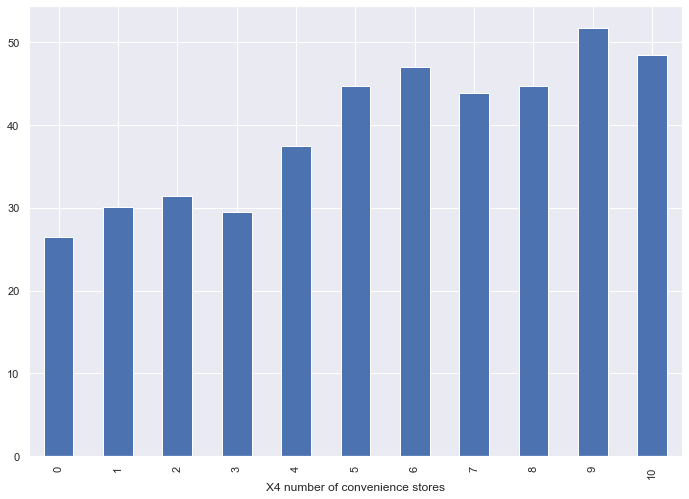

In [396]:
ds.groupby('X4 number of convenience stores')['Y house price of unit area'].mean().plot.bar()

In [397]:
ds.shape

(414, 9)

In [398]:
x = ds.drop('Y house price of unit area', axis = 1)
y = ds['Y house price of unit area']

In [399]:
from sklearn.model_selection import train_test_split

In [400]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [401]:
from sklearn.linear_model import LinearRegression

In [402]:
lm = LinearRegression()

In [403]:
lm.fit(xtrain, ytrain)

LinearRegression()

In [404]:
ypred = lm.predict(xtest)

In [405]:
from sklearn.metrics import r2_score

In [406]:
r2_score(ytest, ypred)

0.6689160049049974

In [407]:
from sklearn.preprocessing import StandardScaler

In [408]:
scx = StandardScaler()
xtrains = scx.fit_transform(xtrain)
scy = StandardScaler()
ytrain = np.array(ytrain).reshape(len(ytrain), 1)
ytrains = scy.fit_transform(ytrain)

In [409]:
from sklearn.svm import SVR

In [410]:
svr = SVR(kernel = 'linear')

In [411]:
svr.fit(xtrains, ytrains)

C:\Users\Yogesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [412]:
ypred = scy.inverse_transform(svr.predict(scx.transform(xtest)))

In [413]:
r2_score(ypred, ytest)

0.44038069478563713

In [414]:
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

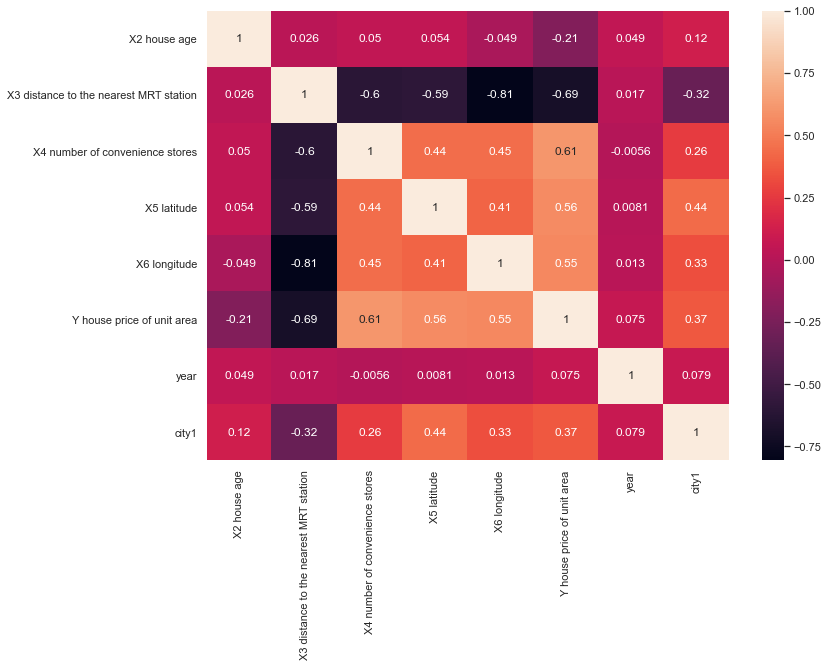

In [415]:
sb.heatmap(ds.corr(), annot = True)